# <font color = black>Importing all the required modules</font>

In [160]:
import numpy as np
import matplotlib
import cv2 as cv
from matplotlib import pyplot as plt

# <font color = black>Importing the testing image</font>

In [161]:
image = cv.imread("3.png")

In [162]:
image.shape

(500, 500, 3)

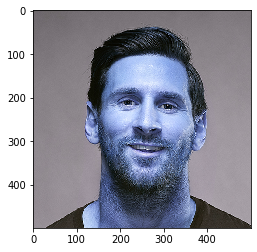

In [163]:
plt.imshow(image)

# CONVERTING THE IMAGE TO GRAY TO WORK WITH CLASSIFIERS

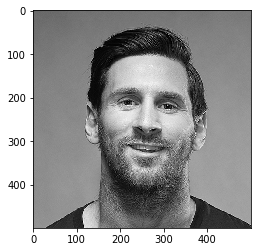

In [164]:
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = "gray")

In [165]:
gray.shape

(500, 500)

In [166]:
print(gray)

[[104 101 101 ... 118 118 117]
 [103 103 104 ... 119 121 119]
 [105 105 103 ... 120 119 121]
 ...
 [142 146 145 ...  39  71  75]
 [150 146 146 ...  41  40  59]
 [147 149 149 ...  42  40  39]]


# IMPORTING THE CLASSIFIERS FROM THE XML FILES

In [167]:
face_cascade = cv.CascadeClassifier("FACE RECOGNITION AND IDENTIFICATION\model\haarcascades\haarcascade_frontalface_default.xml")
eyes_cascade = cv.CascadeClassifier("FACE RECOGNITION AND IDENTIFICATION\model\haarcascades\haarcascade_eye.xml")

In [168]:
faces = face_cascade.detectMultiScale(gray,1.5,5)
faces

array([[128, 110, 273, 273]], dtype=int32)

In [169]:
(x,y,z,h) = faces[0]
x,y,z,h

(128, 110, 273, 273)

# DETECTING THE FACE AND DRAWING THE RECTANGLES

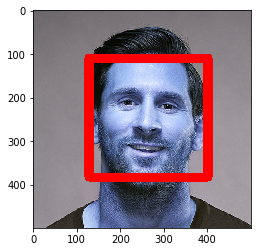

In [170]:
face_img = cv.rectangle(image,(x,y),(x+z,y+h),(255,0,0),20)
plt.imshow(face_img)

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# DETECTING THE EYES AND DRAWING RECTANGLES

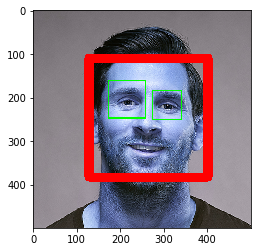

In [171]:
cv.destroyAllWindows()
for (x,y,z,h) in faces:
    face_img = cv.rectangle(image,(x,y),(x+z,y+h),(255,0,0),20)
    roi_gray = gray[y:y+h,x:x+z]
    roi_color = face_img[y:y+h,x:x+z]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ez,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ez,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap = "gray")
plt.show()

# DRAWING ONLY THE REGION OF INTEREST

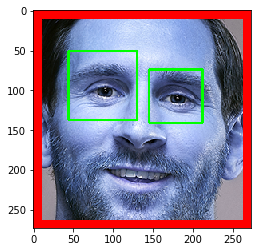

In [172]:
plt.imshow(roi_color,cmap = "gray")

# MAKING A FUNCTION WHICH CAN DETECT EYES AND FACE

In [173]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

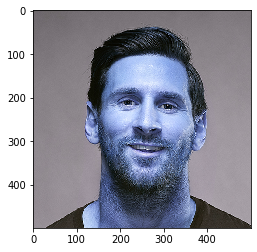

In [174]:
original_image = cv.imread("3.png")
plt.imshow(original_image)

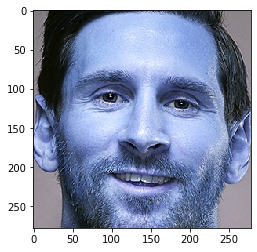

In [175]:
cropped_image = get_cropped_image_if_2_eyes("3.png")
plt.imshow(cropped_image)

# USING THE WAVELET TRANSFORM ON A TEST IMAGE

In [176]:
import pywt
def wavelet_transform(img,mode="haar",level=1):
    img_array = img
    img_array = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)
    img_array = np.float32(img_array)
    img_array /= 255;
    coeffs=pywt.wavedec2(img_array, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

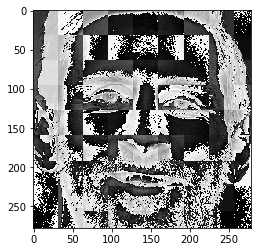

In [177]:
im_har = wavelet_transform(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [178]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [179]:
img_dirs

['FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset\\Aditya',
 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset\\Rahul',
 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset\\Sangeeta',
 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset\\Sunil']

# IMPORTING SHUTIL MODULE TO USE THE IMAGE PATHS

In [180]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [181]:
path_to_data = "FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset"
path_to_cr_data = "FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/"

# FUNCTION TO REMOVE FACES FROM ALL THE PHOTOS

In [182]:
cropped_image_dirs = []
file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    member_name = img_dir.split('\\')[-1]
    print(member_name)
    
    file_names_dict[member_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + member_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = member_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv.imwrite(cropped_file_path, roi_color)
            file_names_dict[member_name].append(cropped_file_path)
            count += 1

Aditya
Generating cropped images in folder:  FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya
Rahul
Generating cropped images in folder:  FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Rahul
Sangeeta
Generating cropped images in folder:  FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Sangeeta
Sunil
Generating cropped images in folder:  FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Sunil


In [186]:
cropped_image_dirs

['FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya',
 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Rahul',
 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Sangeeta',
 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Sunil']

In [187]:
member_file_dict = {}
for img_dirs in cropped_image_dirs:
    member_name = img_dirs.split("/")[-1]
    file_list = []
    for image_files in os.scandir(img_dirs):
        file_list.append(image_files.path)
    member_file_dict[member_name] = file_list
print(member_file_dict)

{'Aditya': ['FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya10.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya11.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya12.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya13.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya14.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya15.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya16.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya17.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya18.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya19.png', 'FACE RECOGNITION AND IDENTIFICATION/model/Family Dataset/cropped/Aditya\\Aditya2.png', 'FACE RECO

In [191]:
member_names = {}
count = 0
for member_name in member_file_dict.keys():
    member_names[member_name] = count
    count = count+1
print(member_names)

{'Aditya': 0, 'Rahul': 1, 'Sangeeta': 2, 'Sunil': 3}


In [202]:
X = []
y = []
for member,training_files in member_file_dict.items():
    for training_image in training_files:
        img = cv.imread(training_image)
        scalled_image = cv.resize(img,(32,32))
        image_wav_transform = wavelet_transform(scalled_image,'db1',5)
        transformed_scalled = cv.resize(image_wav_transform,(32,32))
        image_vertically_stacked = np.vstack((scalled_image.reshape(32*32*3,1),transformed_scalled.reshape(32*32,1)))
        X.append(image_vertically_stacked)
        y.append(member_names[member]) 

In [203]:
print(X[0])

[[ 52]
 [ 76]
 [156]
 ...
 [189]
 [193]
 [192]]
